In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
def build_model():
    inputs=Input(shape=(224,224,3))
    x=Conv2D(16,(3,3),activation='relu')(inputs)
    x=MaxPooling2D()(x)
    x = Conv2D(32, (3, 3), activation='relu', name='target_layer')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

model=build_model()
intermediate_model=Model([model.input],[model.get_layer('target_layer').output])



In [10]:
def load_concept_images(concept_image_path):
    concept_images=[]
    for img_path in concept_image_path:
        img=load_img(img_path,target_size=(224,224,3))
        img_array=img_to_array(img)/255.0
        concept_images.append(img_array)
    return np.array(concept_images)

concept_image_paths=[r"stripes.png"]
stripes=load_concept_images(concept_image_paths)


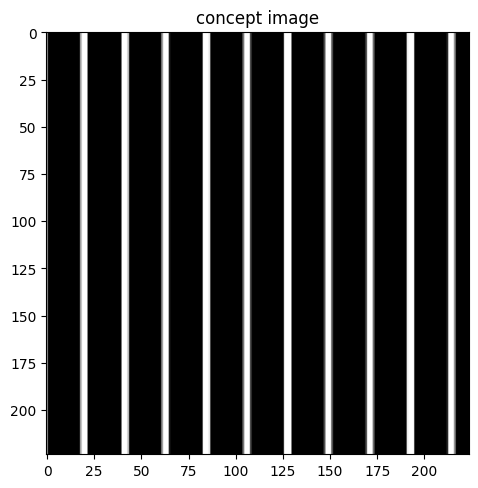

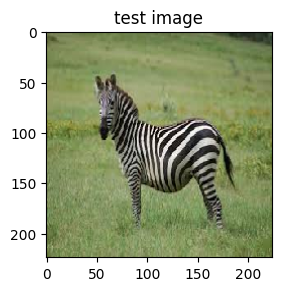

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(stripes[0])
plt.title("concept image")
plt.show()

plt.subplot(1,2,2)
sample_image=img_to_array(load_img("zebra.jpeg",target_size=(224,224,3)))/255.0
plt.imshow(sample_image)
plt.title("test image")
plt.show()

In [13]:
random_images=np.random.rand(20,224,224,3)
activation_stripes=intermediate_model.predict(stripes)
activation_random=intermediate_model.predict(random_images)

X=np.vstack([activation_stripes.reshape(len(stripes),-1), activation_random.reshape(20,-1)])
y=np.array([1]*len(stripes)+[0]*20)
cav=SGDClassifier().fit(X,y).coef_


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


In [14]:
sample_act=intermediate_model.predict(sample_image[np.newaxis, ...]).reshape(-1)
dd=np.dot(sample_act, cav.T)[0]
tcav=(np.dot(activation_stripes.reshape(len(stripes),-1), cav.T)>0).mean()

print(f"Directional Derivative: {dd:.4f}\nTCAV Score: {tcav:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Directional Derivative: -14992.4951
TCAV Score: 1.00
